CNN Model Predictions

In [1]:
# import libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [ ]:
# load model

model = load_model("D:\Tomato Plant Growth Monitoring Project\tomato_model2_results\Models\fine_tuned_tomato_classifier.keras")
print("Model loaded successfully")

Model loaded successfully


In [3]:
class_labels = ['Flowering', 'Semi-Ripe', 'Raw', 'Ripe']     # class names

In [4]:
# Preprocess the image

def preprocess(img):
    new_img = cv.resize(img, (224, 224))     # resize     
    new_img = image.img_to_array(new_img)     # convert to numpy array     
    new_img = np.expand_dims(new_img, axis=0)     # add batch dimension
    new_img /= 255.0     # normalize pixel values

    return new_img

In [5]:
label_to_index = {label: idx for idx, label in enumerate(sorted(set(class_labels)))}     # create dictionary to map each unique class label to a unique integer (index)
index_to_label = {idx: label for label, idx in label_to_index.items()}     # reverse mapping to convert indexes back to class labels
labels = np.array([label_to_index[label] for label in class_labels])     # convert class labels into numerical indexes
labels = to_categorical(labels, num_classes=len(label_to_index))     # convert the numerical labels into one-hot encoded format

In [6]:
# Prediction function

def predict(img_path):
    image = cv.imread(img_path)     # read the image

    img = preprocess(image)     # preprocess image

    result = model.predict(img)     # make prediction
    class_idx = np.argmax(result)     # highest probable class index
    confidence = result[0][class_idx]     # probability value/confidence of prediction
    predicted_label = index_to_label[class_idx]     # convert the predicted class index back to the original class label
    print(f"Predicted: {predicted_label} with the confidence of ({confidence:.2f})")

    plt.imshow(image)

    plt.title(f"Predicted: {predicted_label} ({confidence:.2f})")
    plt.axis('off')     # hide axes

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted: Ripe with the confidence of (0.97)


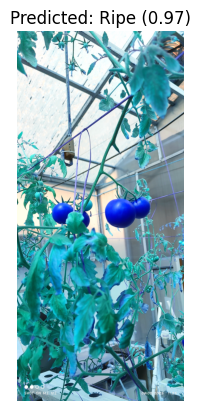

In [ ]:
# make predictions

predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113229.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Predicted: Ripe with the confidence of (0.88)


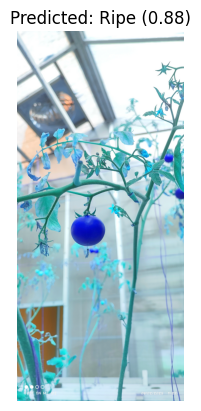

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113523.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted: Flowering with the confidence of (1.00)


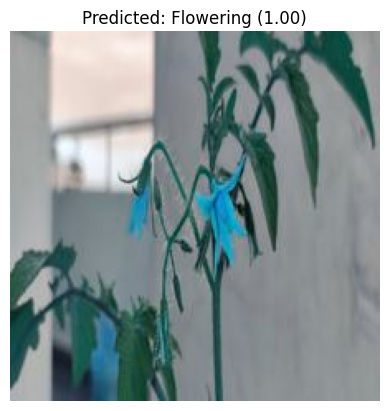

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\041.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted: Flowering with the confidence of (0.78)


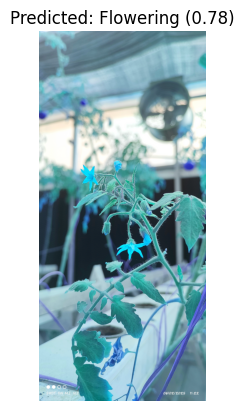

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113559.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicted: Raw with the confidence of (0.71)


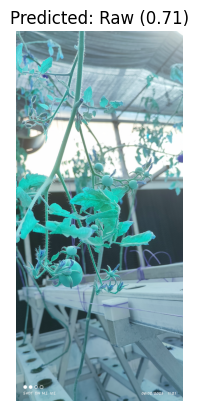

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_112142.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted: Semi-Ripe with the confidence of (0.60)


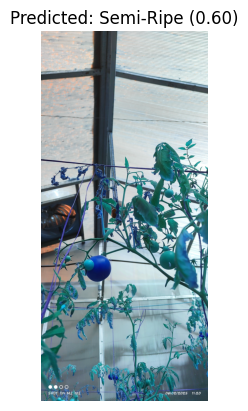

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113732.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted: Ripe with the confidence of (0.53)


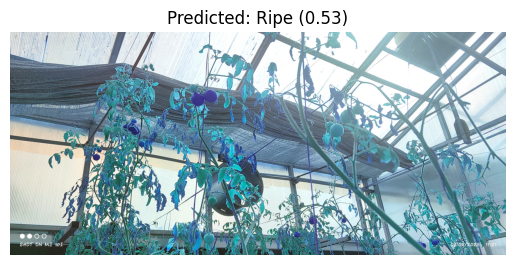

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113716.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted: Ripe with the confidence of (0.63)


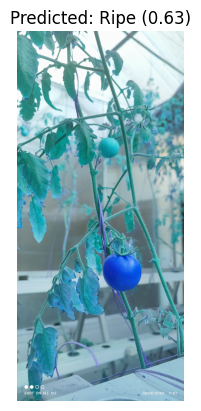

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113631.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted: Raw with the confidence of (0.50)


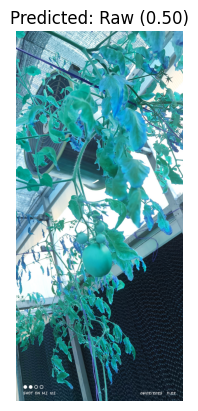

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113435.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted: Flowering with the confidence of (0.69)


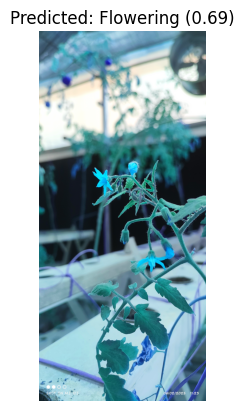

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113352.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Predicted: Semi-Ripe with the confidence of (0.63)


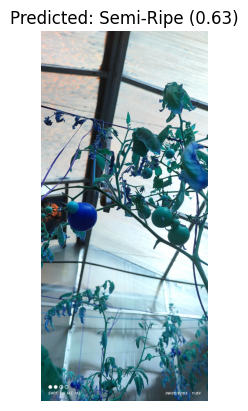

In [ ]:
predict(r"D:\Tomato Plant Growth Monitoring Project\Dataset\Test\IMG_20250206_113315.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted: Raw with the confidence of (0.93)


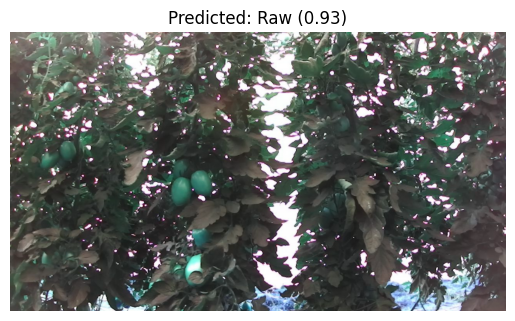

In [22]:
predict(r"D:\Project1\Dataset0\New folder\Half-Ripe, Raw\tomate_barroselas_20200806_0209.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted: Raw with the confidence of (0.98)


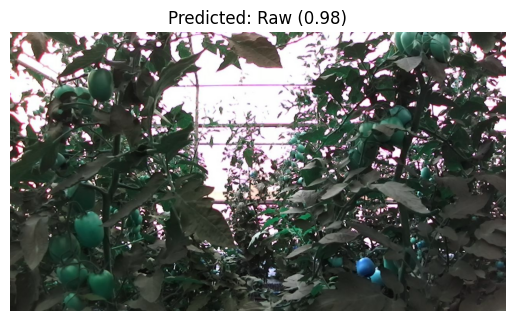

In [23]:
predict(r"D:\Project1\Dataset0\New folder\Half-Ripe, Raw\tomates_2020-08-06-11-35-15_side_0202.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predicted: Ripe with the confidence of (0.97)


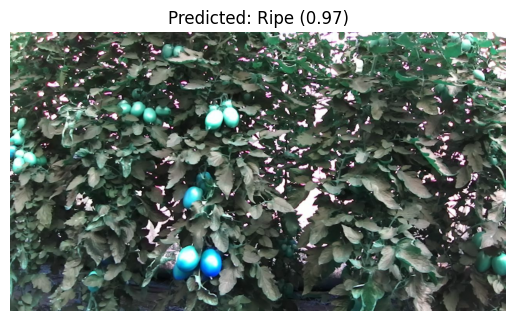

In [24]:
predict(r"D:\Project1\Dataset0\New folder\Half-Ripe, Raw\tomate_barroselas_20200806_0101.jpg")
